In [74]:
!pip install keras
import pandas as pd
from collections import Counter
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# import torch
# import torch.nn as nn
import matplotlib.pyplot as plt 

In [75]:
df=pd.read_csv('./AmazonDataset/Label30000.csv')
print(len(df))
# df = df[df['text'].str.split().str.len().gt(5)]
# df = df[df['text'].str.split().str.len().lt(200)]
df=df.reset_index(drop=None)
print(len(df))
# news=df['text']
# label=df['label']
# len(news)
# current_words=[]
# for i in range(len(news)):
#   # for word in news.loc[i].split(" "):
#     current_words.append(news.loc[i])
# print((current_words[0]))

30000
30000


In [76]:
df=df[['text','label']]
df.loc[1]
# df=df[20000::]
# df=df.reset_index(drop=None)
# df.head()
# df=df[['text','label']]
df.head()


,text,label
0,nape summit also featur annual chariti luncheo...,1
1,appl huge anticip iphon x samsung comeback tou...,1
2,iphon x best phone money isnt issu appl one ex...,1
3,appl aapl premium devic start cool per month d...,1
4,xs spoton face id facialrecognit technolog fan...,1


In [77]:
df['word_count']=df['text'].apply(lambda x: len(str(x).split(" ")))
df.word_count.describe()
common_words=pd.Series(''.join(df['text']).split()).value_counts()
print(common_words[:10])
print("Not Common words")
print(common_words[-10000:])
word_df=pd.DataFrame(common_words)

appl       17966
aapl        5922
inc         5538
share       5099
nasdaq      3430
iphon       3277
compani     3056
report      3055
rate        2902
price       2775
dtype: int64
Not Common words
glossi             1
springshare        1
enova              1
caseone            1
reducappl          1
                  ..
avgovinh           1
newslettkanawha    1
izotop             1
aaplapplnone       1
aimachin           1
Length: 10000, dtype: int64


In [78]:
word_df

,0
appl,17966
aapl,5922
inc,5538
share,5099
nasdaq,3430
...,...
avgovinh,1
newslettkanawha,1
izotop,1
aaplapplnone,1


([<matplotlib.axis.XTick at 0x646272860>,
 <a list of 4 Text xticklabel objects>)

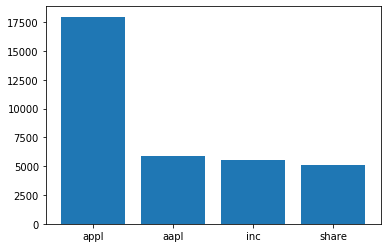

In [79]:
import matplotlib.pyplot as plt
x = np.arange(4)
plt.bar(x, height=[17966,5922,5538,5099])
plt.xticks(x,['appl','aapl','inc','share'])

([<matplotlib.axis.XTick at 0x1a59800400>,
 <a list of 4 Text xticklabel objects>)

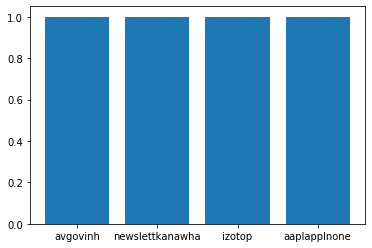

In [80]:
import matplotlib.pyplot as plt
x = np.arange(4)
plt.bar(x, height=[1,1,1,1])
plt.xticks(x,['avgovinh','newslettkanawha','izotop','aaplapplnone'])

In [81]:
increase_df=df[df['label']==1]
decrease_df=df[df['label']==0]

In [82]:
print(increase_df.shape)
print(decrease_df.shape)

(21560, 3)
(8440, 3)


In [83]:
increase_df['word_count']=increase_df['text'].apply(lambda x: len(str(x).split(" ")))
increase_df.word_count.describe()
common_words=pd.Series(''.join(increase_df['text']).split()).value_counts()
print(common_words[:10])
print("Not Common words")
print(common_words[-10000:])
word_df=pd.DataFrame(common_words)

appl       12905
aapl        4261
inc         4007
share       3778
nasdaq      2445
iphon       2336
report      2259
compani     2204
rate        2158
price       2073
dtype: int64
Not Common words
dizain            1
gainpoint         1
misusletter       1
holdtrade         1
videobillion      1
                 ..
alphaappl         1
fue               1
abidiparesh       1
positdisclosur    1
yahoofin          1
Length: 10000, dtype: int64


([<matplotlib.axis.XTick at 0x647fa3c50>,
 <a list of 5 Text xticklabel objects>)

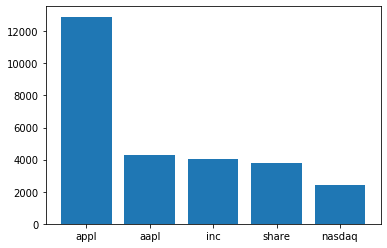

In [84]:
import matplotlib.pyplot as plt
x = np.arange(5)
plt.bar(x, height=[12905,4261,4007,3778,2445])
plt.xticks(x,['appl','aapl','inc','share','nasdaq'])

In [85]:
decrease_df['word_count']=decrease_df['text'].apply(lambda x: len(str(x).split(" ")))
decrease_df.word_count.describe()
common_words=pd.Series(''.join(decrease_df['text']).split()).value_counts()
print(common_words[:10])
print("Not Common words")
print(common_words[-10000:])
word_df=pd.DataFrame(common_words)

appl       5061
aapl       1661
inc        1531
share      1321
nasdaq      985
iphon       941
compani     852
report      796
rate        744
price       702
dtype: int64
Not Common words
obtain            3
underpay          3
eyepop            3
invers            3
split             3
                 ..
rathersee         1
nvfi              1
nrz               1
productamazon     1
sheetsharehold    1
Length: 10000, dtype: int64


([<matplotlib.axis.XTick at 0x647fa30b8>,
 <a list of 5 Text xticklabel objects>)

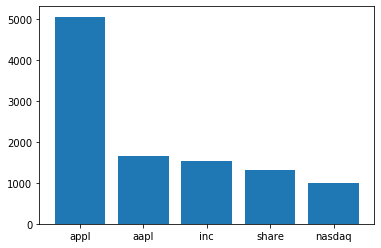

In [86]:
import matplotlib.pyplot as plt
x = np.arange(5)
plt.bar(x, height=[5061,1661,1531,1321,985])
plt.xticks(x,['appl','aapl','inc','share','nasdaq'])

In [87]:
a=[5061,1661,1531,1321,985]
b=[12905,4261,4007,3778,2445]
#print ratio
print(np.array(b)/np.array(a))


[2.54989133 2.5653221  2.61724363 2.85995458 2.4822335 ]


In [88]:
from nltk.tokenize import word_tokenize
most_common=common_words[:3]
least_common=common_words[-1000:]
texts=[]
labels=[]
def removeWords(words):
    final_words=[]
    for word in words:
        if not (word in most_common or word in least_common):
            final_words.append(word)
    return final_words
for i in range(len(df)):
    if i%10000==0:
        print("------>",i)
    words=word_tokenize(df.loc[i].text)
    # print(df.loc[i].text)
    words=removeWords(words)
    extracted_sentence=' '.join(word for word in words)
    # print(df.loc[i].text)
    texts.append(extracted_sentence)
    labels.append(df.loc[i]['label'])
new_df=pd.DataFrame({
    'text':texts,
    'label':labels
})


------> 0
------> 10000
------> 20000


In [89]:
new_df.loc[4]

text     xs spoton face id facialrecognit technolog fan...
label                                                    1
Name: 4, dtype: object

In [90]:
def tokenize(x):
    x_tk = Tokenizer()
    x_tk.fit_on_texts(x)
    return x_tk.texts_to_sequences(x), x_tk
def pad(x, length=None):
    if length is None:
        length = len(max(x, key=len))

    return pad_sequences(x, maxlen=length, padding='post')

In [91]:
tokenize_text=[]
news_label=[]
for n_z in new_df['text']:
  tokenize_text.append(n_z)
for l in new_df['label']:
  news_label.append(l)

print(tokenize_text[1])
print(news_label[0])

huge anticip iphon x samsung comeback tour follow note debacl big year smartphon industri
1


In [92]:
text_tokenized, text_tokenizer=tokenize(tokenize_text)
text_padded=pad(text_tokenized)

In [93]:
print(text_tokenized[0])

[5582, 3096, 34, 261, 621, 2890, 5583, 475, 5584, 4944, 204, 15, 221, 1686, 4945, 201, 875, 5585, 738, 222, 1030, 5586, 5587, 5588, 964, 582, 472, 181, 180, 1530, 1277, 33, 24, 335, 4039, 4040, 399, 3678, 2891, 595]


In [94]:
print((text_padded.shape))
print((text_padded[0]))
trainX=text_padded
print(trainX.shape)
trainY = pd.get_dummies(news_label).values
print(trainY[0])

(30000, 1319)
[5582 3096   34 ...    0    0    0]
(30000, 1319)
[0 1]


In [95]:
from sklearn.model_selection import train_test_split
# trainY = pd.get_dummies(label.values).values
# print(trainY.shape)
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, random_state=56)

In [96]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
trainX.shape

(24000, 1, 1319)

In [97]:
# !pip install tensorflow==1.14.0
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional
from keras.optimizers import Adam
from keras.layers import Embedding
from keras.optimizers import SGD
opt=SGD(lr=0.001)
model = Sequential()
# e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=1500, trainable=False)
# model.add(e)
model.add(Bidirectional(LSTM(128,input_shape=(1,X_train.shape[1]),dropout=0.2)))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.fit(trainX, y_train, epochs=10, batch_size=64, verbose=2,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 19200 samples, validate on 4800 samples
Epoch 1/10
 - 3s - loss: 0.6515 - accuracy: 0.6368 - val_loss: 0.6226 - val_accuracy: 0.6883
Epoch 2/10
 - 2s - loss: 0.6140 - accuracy: 0.7027 - val_loss: 0.6120 - val_accuracy: 0.7027
Epoch 3/10
 - 2s - loss: 0.6084 - accuracy: 0.7095 - val_loss: 0.6093 - val_accuracy: 0.7073
Epoch 4/10
 - 2s - loss: 0.6041 - accuracy: 0.7122 - val_loss: 0.6058 - val_accuracy: 0.7088
Epoch 5/10
 - 2s - loss: 0.6033 - accuracy: 0.7135 - val_loss: 0.6068 - val_accuracy: 0.7110
Epoch 6/10
 - 2s - loss: 0.6025 - accuracy: 0.7145 - val_loss: 0.6071 - val_accuracy: 0.7123
Epoch 7/10
 - 2s - loss: 0.6007 - accuracy: 0.7149 - val_loss: 0.6053 - val_accuracy: 0.7121
Epoch 8/10
 - 2s - loss: 0.5992 - accuracy: 0.7160 - val_loss: 0.6033 - val_accuracy: 0.7119
Epoch 9/10
 - 2s - loss: 0.6006 - accuracy: 0.7173 - val_loss: 0.6040 - val_accuracy: 0.7129
Epoch 10/10
 - 2s -

In [98]:
score, acc= model.evaluate(testX, y_test,verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.6002976104418437
Test accuracy: 0.718833327293396


In [99]:
from sklearn.metrics import classification_report
y_pred = model.predict(testX)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred_b = np.argmax(y_test, axis=1)
print(classification_report(y_pred_b, y_pred_bool))

precision    recall  f1-score   support

           0       0.38      0.01      0.02      1678
           1       0.72      0.99      0.84      4322

    accuracy                           0.72      6000
   macro avg       0.55      0.50      0.43      6000
weighted avg       0.63      0.72      0.61      6000



In [100]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [102]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [105]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
score = loaded_model.evaluate(testX, y_test, verbose=0)
print(score)

[0.6002976104418437, 0.718833327293396]


In [110]:
twitter_df=pd.read_csv('SWM_git_repository/GetOldTweets-python/Label6225.csv')
print(len(df))

6226


In [109]:
twitter_df['word_count']=twitter_df['text'].apply(lambda x: len(str(x).split(" ")))
twitter_df.word_count.describe()
common_words=pd.Series(''.join(twitter_df['text']).split()).value_counts()
print(common_words[:10])
print("Not Common words")
print(common_words[-10000:])
word_df=pd.DataFrame(common_words)

appl       5061
aapl       1661
inc        1531
share      1321
nasdaq      985
iphon       941
compani     852
report      796
rate        744
price       702
dtype: int64
Not Common words
obtain            3
underpay          3
eyepop            3
invers            3
split             3
                 ..
rathersee         1
nvfi              1
nrz               1
productamazon     1
sheetsharehold    1
Length: 10000, dtype: int64
